<a href="https://colab.research.google.com/github/XFabian001/Data-Mining-22/blob/main/Xavier-13-Cratesbarrels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#Import files

import pandas as pd

salesTrain = pd.read_csv('train.csv')
salesTest = pd.read_csv('test.csv')

#Look into the dataset for salesTrain
salesTrain.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [27]:

#Look at dataset for salesTest
salesTest.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [28]:
#Look at the shape of data
print('test shape:', salesTest.shape)
print('train shape: ', salesTrain.shape)

test shape: (144368, 94)
train shape:  (61878, 95)


In [29]:
#Here we divide the and conquer the data and only focus on target

sales_train_features = salesTrain.copy()
sales_train_features = sales_train_features.drop('target', axis = 1) 

sales_test_features = salesTest

sales_train_labels = salesTrain[['target']]

sales_train_labels
     

,target
0,Class_1
1,Class_1
2,Class_1
3,Class_1
4,Class_1
...,...
61873,Class_9
61874,Class_9
61875,Class_9
61876,Class_9


In [30]:
#Peak into format of sets
print(sales_train_features.shape)
print(sales_train_labels.shape)
print(sales_test_features.shape)

(61878, 94)
(61878, 1)
(144368, 94)


In [32]:
#We use axgboost and instantiate model
from xgboost import XGBClassifier


params = { "n_estimators": 400, 'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'max_depth': 6  }


model = XGBClassifier(**params)
model
     

XGBClassifier(max_depth=6, n_estimators=400, predictor='gpu_predictor',
              tree_method='gpu_hist')

In [33]:
#Using the train features and the train labels to train the Model 
model.fit(sales_train_features, sales_train_labels)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=6, n_estimators=400, objective='multi:softprob',
              predictor='gpu_predictor', tree_method='gpu_hist')

In [34]:
#Here we encode the data and get the accuracy of the model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown= 'ignore')


sales_test_features2 = salesTest
salesencoder = encoder.fit_transform(sales_test_features2)
salesencoder



sales_predictions = model.predict(sales_test_features2) #test features

In [35]:
#Get ID of columns
Y1 = salesTest[['id']]
Y1

,id
0,1
1,2
2,3
3,4
4,5
...,...
144363,144364
144364,144365
144365,144366
144366,144367


In [36]:
#Convert array into data set, after setting prediction into data frame, we set the ID as the index, then get values of target column
X1 = pd.DataFrame(sales_predictions, columns=  ['target'], index = sub['id'])
X1 = pd.get_dummies(X1.target)
X1

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
id,,,,,,,,,
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,1
144365,0,0,0,0,0,0,0,0,1
144366,0,0,0,0,0,0,0,0,1


In [37]:
#Submission
X1.to_csv('Submission_cratesbarrels.csv')

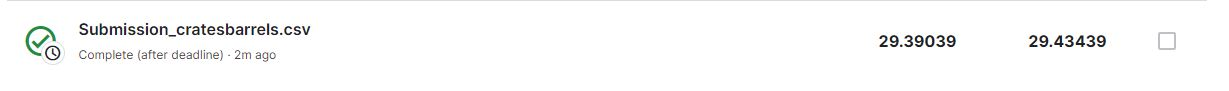